In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/ahmedmajid/Desktop/Digital-Twin-for Smart-Energy-Meters/digital-twin-mvp/data/processed_telemetry.csv")
df.head()

,timestamp,temperature,vibration,pressure,anomaly_overheat,anomaly_vibration,anomaly_pressure_low,anomaly_pressure_high,anomaly,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,2025-12-31 16:17:27.605538,58.95,1.03,106.15,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
1,2025-12-31 16:17:29.605538,46.33,0.67,91.05,False,False,True,False,1,51.376,5.012263,0.762,0.20584,104.34,7.496192
2,2025-12-31 16:17:31.605538,47.32,0.66,108.21,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
3,2025-12-31 16:17:33.605538,51.99,0.53,108.83,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192
4,2025-12-31 16:17:35.605538,52.29,0.92,107.46,False,False,False,False,0,51.376,5.012263,0.762,0.20584,104.34,7.496192


In [2]:
features = [
    "temperature",
    "vibration",
    "pressure",
    "temp_roll_mean",
    "temp_roll_std",
    "vib_roll_mean",
    "vib_roll_std",
    "pres_roll_mean",
    "pres_roll_std"
]

X = df[features]
X.head()

,temperature,vibration,pressure,temp_roll_mean,temp_roll_std,vib_roll_mean,vib_roll_std,pres_roll_mean,pres_roll_std
0,58.95,1.03,106.15,51.376,5.012263,0.762,0.20584,104.34,7.496192
1,46.33,0.67,91.05,51.376,5.012263,0.762,0.20584,104.34,7.496192
2,47.32,0.66,108.21,51.376,5.012263,0.762,0.20584,104.34,7.496192
3,51.99,0.53,108.83,51.376,5.012263,0.762,0.20584,104.34,7.496192
4,52.29,0.92,107.46,51.376,5.012263,0.762,0.20584,104.34,7.496192


In [3]:
model = IsolationForest(
    n_estimators=200,
    contamination=0.05,   # expected anomaly percentage
    random_state=42
)

model.fit(X)

,n_estimators,200
,max_samples,'auto'
,contamination,0.05
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [4]:
df['iforest_pred'] = model.predict(X)
df['iforest_anomaly'] = df['iforest_pred'].apply(lambda x: 1 if x == -1 else 0)

df[['timestamp', 'temperature', 'vibration', 'pressure', 'iforest_anomaly']].head()

,timestamp,temperature,vibration,pressure,iforest_anomaly
0,2025-12-31 16:17:27.605538,58.95,1.03,106.15,0
1,2025-12-31 16:17:29.605538,46.33,0.67,91.05,0
2,2025-12-31 16:17:31.605538,47.32,0.66,108.21,0
3,2025-12-31 16:17:33.605538,51.99,0.53,108.83,0
4,2025-12-31 16:17:35.605538,52.29,0.92,107.46,0


In [5]:
df[['anomaly', 'iforest_anomaly']].head()

,anomaly,iforest_anomaly
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0


In [6]:
(df['anomaly'] == df['iforest_anomaly']).mean()

np.float64(0.6726666666666666)

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

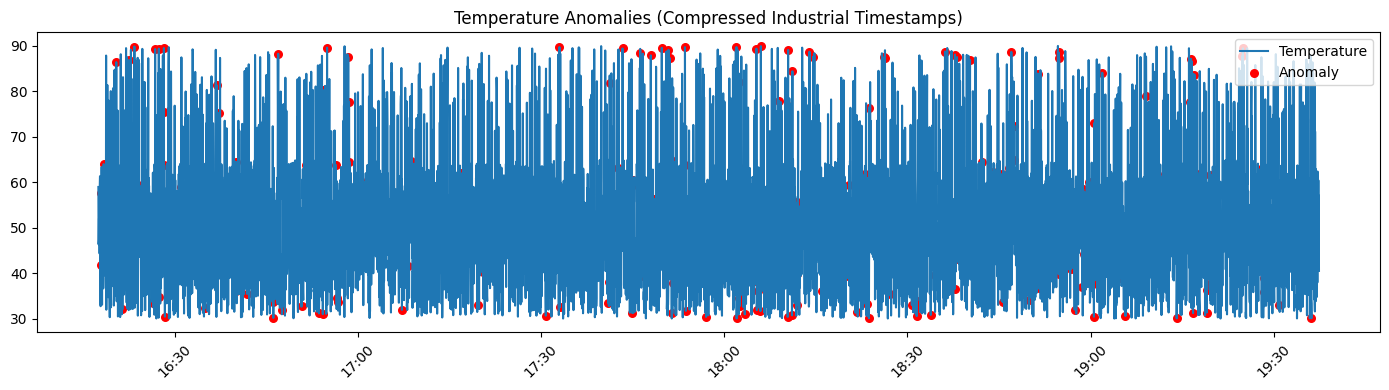

In [8]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,4))

# Plot clean data
ax.plot(df['timestamp'], df['temperature'], label='Temperature')

# Plot anomaly dots
ax.scatter(
    df[df['iforest_anomaly']==1]['timestamp'],
    df[df['iforest_anomaly']==1]['temperature'],
    color='red',
    label='Anomaly',
    s=30
)

# Use compressed industrial-style timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xticks(rotation=45)
plt.title("Temperature Anomalies (Compressed Industrial Timestamps)")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
import joblib
joblib.dump(model, "isolation_forest_model.pkl")

['isolation_forest_model.pkl']